a) Cargue la base de datos

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import umap
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [4]:
!pip install umap-learn


[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: C:\Users\bebit\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
# La base de datos House_price.csv contiene información de casas. La idea es obtener un modelo que permita predecir el valor de venta de una casa.
# Las variables son las siguientes:
# ● LotFrontage: Pies lineales de calle conectados a la propiedad
# ● LotArea: Tamaño del lote en pies cuadrados
# ● MasVnrArea: Área de revestimiento de mampostería en pies cuadrados
# ● BsmtFinSF1: Pies cuadrados del sótano terminados tipo 1
# ● BsmtFinSF2: Pies cuadrados con del sótano acabados tipo 2
# ● BsmtUnfSF: Pies cuadrados sin terminar de área del sótano
# ● TotalBsmtSF: Total de pies cuadrados de área del sótano
# ● 1stFlrSF: Pies cuadrados del primer piso
# ● 2ndFlrSF: Pies cuadrados del segundo piso
# ● LowQualFinSF: Pies cuadrados con acabado de baja calidad (todos los pisos)
# ● GrLivArea: Pies cuadrados de área habitable sobre el nivel (suelo)
# ● GarageArea: Tamaño del garaje en pies cuadrados
# ● WoodDeckSF: Área de la plataforma de madera en pies cuadrados
# ● OpenPorchSF: Área del porche abierto en pies cuadrados
# ● EnclosedPorch: Área del porche cerrado en pies cuadrados
# ● 3SsnPorch: área de porche de tres estaciones en pies cuadrados
# ● ScreenPorch: Área del porche de la pantalla en pies cuadrados
# ● PoolArea: Área de la piscina en pies cuadrados
# ● MiscVal: Valor de la función miscelánea
# ● SalePrice: el precio de venta de la propiedad en dólares. Esta es la variable objetivo que se quiere modelar.


# función para reducir número de variables explicativas para entrenar modelo
def pca(X):
  """
  input: X (variables explicativas)
  out: X (variables PCA)
  """
  # Mantener componentes que explican el 80% de la varianza
  pca = PCA(n_components=0.80)
  pca.fit(X)
  X_pca = pca.transform(X)
  # Tomar los componentes principales que explican el 80% de la varianza
  n_components = X_pca.shape[1]
  print(f'Número de componentes: {n_components}')
  return pca, X_pca

# función para definir datos de entrenamiento y prueba
def split_dataset(X, y, train_size=0.8):
  """
    input: X, y, train_size
    output: X_train, X_test, y_train, y_test
  """
  # División de los datos en entrenamiento y prueba
  X_train, X_test, y_train, y_test = train_test_split(
                                          X,
                                          y,
                                          train_size   = train_size,
                                          random_state = 42,
                                          shuffle      = True
                                      )
  return X_train, X_test, y_train, y_test

def crear_entrenar_pred_modelo(X, y, train_size):
  """
    rutina de prueba
    input: X, y, train_size
    output: scores, mean_score, model_coef, model_intercept, scatter_plot_residual
  """
  # Creación del modelo
  modelo = LinearRegression(fit_intercept=True)
  # Realizar validación cruzada
  scores = cross_val_score(
      modelo, X, y, cv=5
  )
  display("Puntuaciones de validación cruzada:", scores)

  mean_score = scores.mean()
  display("Puntuación promedio:", mean_score)

  # Crear un modelo de regresión lineal
  modelo = LinearRegression()
  
  # Dividir los datos en entrenamiento y prueba
  X_train, X_test, y_train, y_test = split_dataset(X, y, train_size=train_size)

  # Ajustar el modelo con los datos de entrenamiento
  modelo.fit(X_train, y_train)

  # Evaluar el modelo con los datos de prueba
  score = modelo.score(X_test, y_test)

  print("Puntuación del modelo:", score)

  coefficients = modelo.coef_
  intercept = modelo.intercept_
  display("Coeficientes:", coefficients)
  display("Intercepto:", intercept)

  # Inspeccionar los residuos del modelo
  y_pred = modelo.predict(X_test)
  residuals = y_test - y_pred
  print(residuals.shape, y_test.shape, y_pred.shape)
  sns.scatterplot(x=y_test, y=residuals)


In [5]:
house_price_df = pd.read_csv('C:/Users/bebit/Desktop/tareas/csv/house_price.csv', sep=';')
house_price_df

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,1,65.0,8450,196.0,706,0,150,856,856,854,...,1710,548,0,61,0,0,0,0,0,208500
1,2,80.0,9600,0.0,978,0,284,1262,1262,0,...,1262,460,298,0,0,0,0,0,0,181500
2,3,68.0,11250,162.0,486,0,434,920,920,866,...,1786,608,0,42,0,0,0,0,0,223500
3,4,60.0,9550,0.0,216,0,540,756,961,756,...,1717,642,0,35,272,0,0,0,0,140000
4,5,84.0,14260,350.0,655,0,490,1145,1145,1053,...,2198,836,192,84,0,0,0,0,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,62.0,7917,0.0,0,0,953,953,953,694,...,1647,460,0,40,0,0,0,0,0,175000
1456,1457,85.0,13175,119.0,790,163,589,1542,2073,0,...,2073,500,349,0,0,0,0,0,0,210000
1457,1458,66.0,9042,0.0,275,0,877,1152,1188,1152,...,2340,252,0,60,0,0,0,0,2500,266500
1458,1459,68.0,9717,0.0,49,1029,0,1078,1078,0,...,1078,240,366,0,112,0,0,0,0,142125


In [6]:
# a) Cargue la base de datos, ¿hay alguna columna que no sea útil para el análisis?. Revise si existen casos faltantes en la base de datos, según la
# descripción de las variables, ¿qué pudiera significar un NA? Tome decisiones de qué hacer si existen casos faltantes. Si desea imputar los
# valores nulos de alguna variable por un valor puede utilizar data["columna"].fillna('valor', inplace = True).

house_price_df.describe()

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1460.000000,1201.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,70.049958,10516.828082,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,...,1515.463699,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890
std,421.610009,24.284752,9981.264932,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,...,525.480383,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883
min,1.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,...,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,365.750000,59.000000,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,...,1129.500000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000
50%,730.500000,69.000000,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,...,1464.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000
75%,1095.250000,80.000000,11601.500000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,...,1776.750000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000
max,1460.000000,313.000000,215245.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,...,5642.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,755000.000000


In [7]:
# buscamos existencia de datos NaN
house_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   MasVnrArea     1452 non-null   float64
 4   BsmtFinSF1     1460 non-null   int64  
 5   BsmtFinSF2     1460 non-null   int64  
 6   BsmtUnfSF      1460 non-null   int64  
 7   TotalBsmtSF    1460 non-null   int64  
 8   1stFlrSF       1460 non-null   int64  
 9   2ndFlrSF       1460 non-null   int64  
 10  LowQualFinSF   1460 non-null   int64  
 11  GrLivArea      1460 non-null   int64  
 12  GarageArea     1460 non-null   int64  
 13  WoodDeckSF     1460 non-null   int64  
 14  OpenPorchSF    1460 non-null   int64  
 15  EnclosedPorch  1460 non-null   int64  
 16  3SsnPorch      1460 non-null   int64  
 17  ScreenPorch    1460 non-null   int64  
 18  PoolArea

In [8]:
# Las variables "LotFrontage" y MasVnrArea" presentan valores NaN
print(f"registros en variable LotFrontage que contiene valores NaN: {len(house_price_df[house_price_df.LotFrontage.isna()])}")
print(f"registros en variable MasVrnArea  que contiene valores NaN: {len(house_price_df[house_price_df.MasVnrArea.isna()])}")

registros en variable LotFrontage que contiene valores NaN: 259
registros en variable MasVrnArea  que contiene valores NaN: 8


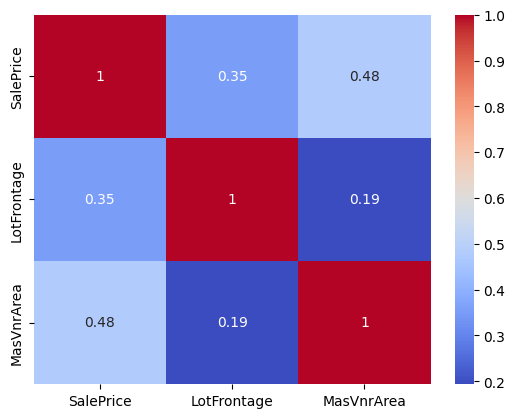

In [9]:
# Calcular la matriz de correlación
a = pd.DataFrame()
a['SalePrice'] = house_price_df.SalePrice
a['LotFrontage'] = house_price_df.LotFrontage
a['MasVnrArea'] = house_price_df.MasVnrArea
correlation_matrix = a.corr()

# Crear el mapa de calor
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Mostrar el gráfico
plt.show()

In [10]:
# revisada la información, dado que las variable son una característica importante para evaluar el precio de las casas,
# se opta por reemplazar los valores faltante por el promedio de cada variable
media = np.nanmean(house_price_df.LotFrontage)
house_price_df.LotFrontage.fillna(np.nanmean(house_price_df.LotFrontage), inplace=True)
# alternativa
house_price_df[house_price_df.MasVnrArea.isna()] = house_price_df.MasVnrArea.mean()

In [11]:
# revisión de los cambios
house_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   float64
 1   LotFrontage    1460 non-null   float64
 2   LotArea        1460 non-null   float64
 3   MasVnrArea     1460 non-null   float64
 4   BsmtFinSF1     1460 non-null   float64
 5   BsmtFinSF2     1460 non-null   float64
 6   BsmtUnfSF      1460 non-null   float64
 7   TotalBsmtSF    1460 non-null   float64
 8   1stFlrSF       1460 non-null   float64
 9   2ndFlrSF       1460 non-null   float64
 10  LowQualFinSF   1460 non-null   float64
 11  GrLivArea      1460 non-null   float64
 12  GarageArea     1460 non-null   float64
 13  WoodDeckSF     1460 non-null   float64
 14  OpenPorchSF    1460 non-null   float64
 15  EnclosedPorch  1460 non-null   float64
 16  3SsnPorch      1460 non-null   float64
 17  ScreenPorch    1460 non-null   float64
 18  PoolArea

In [10]:
# b) La variable a modelar corresponde al precio de venta de la casa en dólares. En base a los modelos que hemos aprendido en clases, ¿qué
# modelo(s) podría(n) ser de utilidad para predecir el precio de venta de casas mediante las variables predictoras?


# Un modelo de regresión lineal puede ser utilizado para predecir el precio de las viviendas. Al contar con la variable objetivo numérica 
# (precio de venta), podemos ajustar una línea recta que se ajuste a los datos disponibles. El modelo establece una relación lineal entre 
# las variables predictoras y el precio de venta, encontrando los coeficientes óptimos mediante técnicas de optimización. Una vez ajustado, 
# el modelo puede utilizarse para hacer predicciones sobre el precio de venta de viviendas nuevas. Es importante considerar que el modelo 
# de regresión lineal asume una relación lineal, por lo que modelos más avanzados podrían ser necesarios para capturar relaciones no 
# lineales o complejas.

In [11]:
# c) Vamos a implementar un modelo de regresión lineal para modelar el precio de venta de casas. Considerando que en la base de datos
# tenemos varias variables que dependen de otras, ¿cuál pudiera ser el problema que surgiría en este contexto? ¿por qué esto es un problema? Discuta.


# El problema que puede surgir al tener varias variables que dependen de otras en el contexto de implementar un modelo de regresión lineal 
# para predecir el precio de venta de casas es la multicolinealidad. La multicolinealidad se refiere a la alta correlación entre las variables 
# predictoras, lo que dificulta la interpretación de los coeficientes y puede llevar a resultados poco confiables. Esto puede generar coeficientes 
# inestables y sensibles a cambios en los datos, así como problemas de sobreajuste. Para abordar la multicolinealidad, se pueden utilizar técnicas 
# como la eliminación de variables redundantes, la transformación de variables o el uso de métodos de regularización. Estas técnicas ayudan a 
# reducir la influencia de la multicolinealidad y mejorar la estabilidad y el rendimiento del modelo.

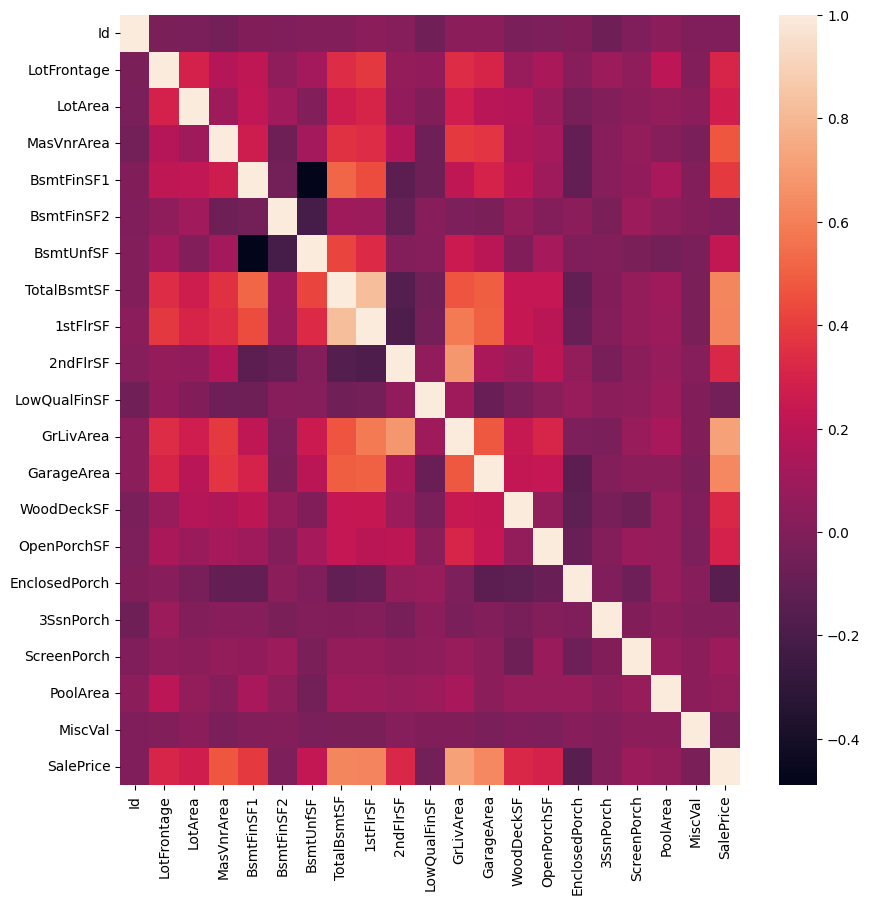

In [12]:
#d) Realice un análisis de la correlación entre las variables. Comente, existen variables muy correlacionadas entre sí? ¿Por qué cree que ocurre?

corr = house_price_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()

In [13]:
house_price_df.corr()

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
Id,1.000000,-0.023181,-0.024153,-0.049997,-0.001188,-0.008324,0.000253,-0.000224,0.030230,0.011788,...,0.029434,0.029003,-0.028575,-0.013128,-0.006266,-0.071599,-0.010978,0.036051,-0.007052,-0.006682
LotFrontage,-0.023181,1.000000,0.295420,0.178562,0.209169,0.046299,0.110115,0.337984,0.381594,0.068289,...,0.337068,0.304458,0.076164,0.141244,0.021079,0.087796,0.050574,0.197665,0.002231,0.307920
LotArea,-0.024153,0.295420,1.000000,0.103851,0.216335,0.109316,0.001748,0.266588,0.304448,0.055905,...,0.270378,0.188522,0.172231,0.080940,-0.030495,0.001062,0.034130,0.062334,0.037425,0.273001
MasVnrArea,-0.049997,0.178562,0.103851,1.000000,0.264337,-0.072294,0.114099,0.359313,0.337588,0.174413,...,0.383362,0.370068,0.159716,0.125444,-0.109667,0.018223,0.061047,0.011526,-0.029814,0.470849
BsmtFinSF1,-0.001188,0.209169,0.216335,0.264337,1.000000,-0.050626,-0.489652,0.521872,0.444630,-0.133129,...,0.212476,0.299625,0.204737,0.103791,-0.110351,0.012685,0.056374,0.128764,0.003413,0.387194
BsmtFinSF2,-0.008324,0.046299,0.109316,-0.072294,-0.050626,1.000000,-0.211020,0.100786,0.091619,-0.100516,...,-0.013810,-0.020719,0.067792,0.005953,0.039125,-0.022883,0.090880,0.045646,0.005032,-0.014497
BsmtUnfSF,0.000253,0.110115,0.001748,0.114099,-0.489652,-0.211020,1.000000,0.421756,0.326318,0.009316,...,0.250572,0.191709,-0.004603,0.124599,-0.011285,0.001213,-0.021398,-0.048565,-0.024475,0.224964
TotalBsmtSF,-0.000224,0.337984,0.266588,0.359313,0.521872,0.100786,0.421756,1.000000,0.823311,-0.162726,...,0.470448,0.496310,0.230334,0.231120,-0.113832,-0.002567,0.065655,0.094134,-0.019423,0.623177
1stFlrSF,0.030230,0.381594,0.304448,0.337588,0.444630,0.091619,0.326318,0.823311,1.000000,-0.186810,...,0.582692,0.502380,0.232815,0.193197,-0.090461,0.005258,0.064704,0.091478,-0.022289,0.619533
2ndFlrSF,0.011788,0.068289,0.055905,0.174413,-0.133129,-0.100516,0.009316,-0.162726,-0.186810,1.000000,...,0.684406,0.143838,0.090658,0.207257,0.059782,-0.033757,0.035655,0.072789,0.015875,0.324805


In [ ]:
# ¿existen variables muy correlacionadas entre sí? 

# Aunque se observa cierta interrelación entre las variables explicativas en la base de datos, estas correlaciones no son demasiado fuertes 
# o altamente correlacionadas entre sí. Esto significa que no hay un problema significativo de multicolinealidad en este contexto.
# Sin embargo, como medida preventiva y para mejorar la interpretación del modelo de regresión lineal, se pueden considerar algunas acciones. 
# Por ejemplo, eliminar variables redundantes o realizar transformaciones de variables pueden ayudar a reducir los efectos no deseados y mejorar 
# la precisión del modelo. Estas medidas adicionales pueden ser aplicadas de forma opcional para garantizar que el modelo capture de manera más 
# precisa la relación entre las variables predictoras y el precio de venta de las casas.

#¿Por qué cree que ocurre?
# Muchas de las variables describen medidas en términos de distancias. Esto implica que al aumentar o disminuir una unidad de medida, todas las 
# variables que dependen de esa unidad también se verán afectadas en la misma dirección. Por ejemplo, si se incrementa la superficie de la vivienda, 
# todas las variables relacionadas con las superficies también aumentarán, y viceversa.

In [16]:
# e) Suponga que este es un problema de gran volumen, donde tenemos muchas columnas y registros. Cuando existen variables muy
# correlacionadas el costo computacional para obtener el modelo puede ser muy elevado. Obtenga el tiempo de procesamiento para obtener
# una regresión lineal. Para esto, podemos obtener la regresión lineal utilizando la función LinearRegression de sklearn.linear_model y
#calcular el tiempo de procesamiento de la siguiente forma:
# from datetime import datetime
# start=datetime.now()
# [aquí va el código del modelo]
# print(datetime.now()-start) #esto entrega el tiempo que demoró en correr el modelo.

regression_model = LinearRegression()
regression_model.fit(X, y)  

start_time = datetime.now()
regression_model.fit(X, y)  
end_time = datetime.now()
processing_time = end_time - start_time
print("Tiempo de procesamiento:", processing_time)


Tiempo de procesamiento: 0:00:00.004527


In [20]:
# f) Obtenga las componentes principales utilizando las variables estandarizadas, si desea explicar un 80% de la variabilidad, ¿cuántas
# componentes debería elegir? Argumente.

# Estandarizar las variables
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Aplicar PCA
pca = PCA()
X_pca = pca.fit_transform(X_std)

# Calcular la proporción acumulada de varianza explicada
variance_ratio_cumulative = np.cumsum(pca.explained_variance_ratio_)

# Determinar el número de componentes necesarias para alcanzar al menos el 80% de varianza acumulada
n_components = np.argmax(variance_ratio_cumulative >= 0.8) + 1

print("Número de componentes necesarias para explicar al menos el 80% de la variabilidad:", n_components)

#Argumente
# Al utilizar el análisis de componentes principales (PCA) para explicar al menos el 80% de la variabilidad, se debe elegir el número 
# de componentes necesarias para alcanzar este umbral. Esto se determina encontrando el punto en la proporción acumulada de varianza 
# explicada donde se alcanza o supera el 80%. Esta elección permite retener una cantidad significativa de información mientras se reduce 
# la dimensionalidad del conjunto de variables.


Número de componentes necesarias para explicar al menos el 80% de la variabilidad: 12


In [26]:
# g) Corra el modelo de regresión lineal con las componentes principales como variables predictoras. Vuelva a calcular el tiempo de
# procesamiento. 

start=datetime.now()

print(datetime.now() - start)



0:00:00


In [ ]:
# En cual caso suele demorarse menos?
# El que contiene una dimensionalidad menor.

In [ ]:
# Que gana al realizar componentes principales?

# Al utilizar componentes principales en un modelo de regresión lineal, obtenemos beneficios como la reducción de dimensiones, la 
# identificación de patrones y tendencias, la eliminación de variables altamente correlacionadas, la visualización de datos de alta 
# dimensionalidad y la compresión de grandes volúmenes de datos. Esto mejora la eficiencia y la interpretación del modelo.